In [5]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [7]:
df=pd.read_csv("C:\\Users\\91789\\Downloads\\archive (7)\\twitter_validation.csv",header=None)

In [8]:
df.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [9]:
df.shape

(1000, 4)

In [10]:
df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91789\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
df.columns = ['id','entity','sentiment','text']


In [13]:
df.head()

,id,entity,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [14]:
df.isnull().sum()

id           0
entity       0
sentiment    0
text         0
dtype: int64

In [15]:
df = df[["entity", "sentiment", "text"]]

In [16]:
df['sentiment'] = df['sentiment'].str.lower().replace({
    'positive':'Positive',
    'negative':'Negative',
    'neutral' : 'Neutral'
})

In [17]:
sia = SentimentIntensityAnalyzer()

In [18]:
def get_sentiment(text):
    score = sia.polarity_scores(text)
    return 'Positive' if score['compound'] > 0.05 else 'Negative' if score['compound'] < -0.05 else 'Neutral'

In [19]:
df['predicted_sentiment'] = df['text'].astype(str).apply(get_sentiment)
print(df.head())


      entity   sentiment                                               text  \
0   Facebook  irrelevant  I mentioned on Facebook that I was struggling ...   
1     Amazon     Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...   
2  Microsoft    Negative  @Microsoft Why do I pay for WORD when it funct...   
3      CS-GO    Negative  CSGO matchmaking is so full of closet hacking,...   
4     Google     Neutral  Now the President is slapping Americans in the...   

  predicted_sentiment  
0            Negative  
1             Neutral  
2            Negative  
3             Neutral  
4            Positive  


C:\Users\91789\AppData\Local\Temp\ipykernel_6820\3775876762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['predicted_sentiment'],palette="coolwarm")


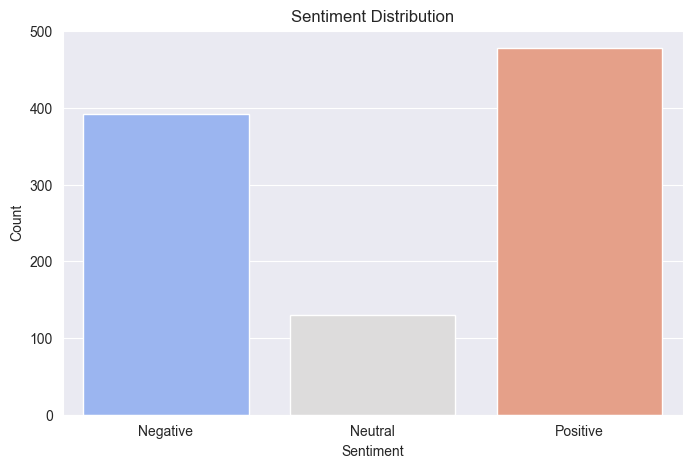

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['predicted_sentiment'],palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_wordcloud(sentiment):
    text = " ".join(df[df['predicted_sentiment'] == sentiment]['text'].dropna())

    if not text.strip():  # Check if there's no text
        print(f"No data available for {sentiment} sentiment.")
        return
    
    # Create word cloud inside the function
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Display word cloud
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()


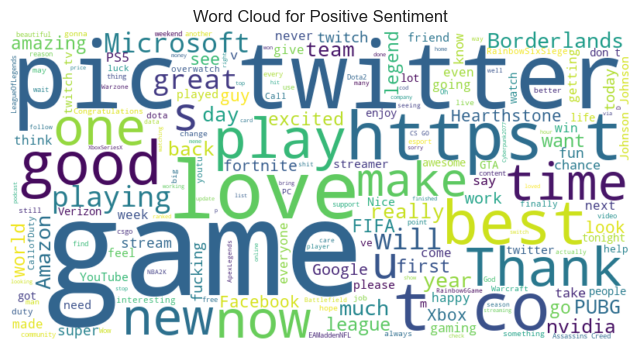

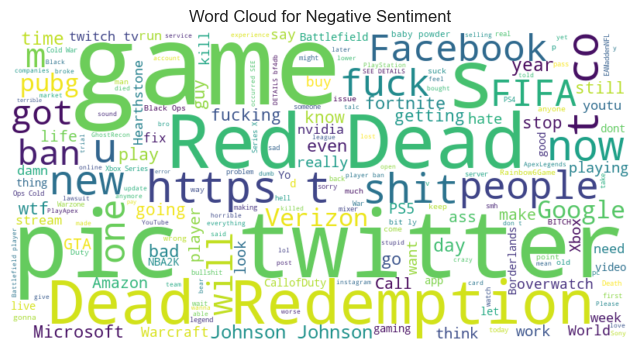

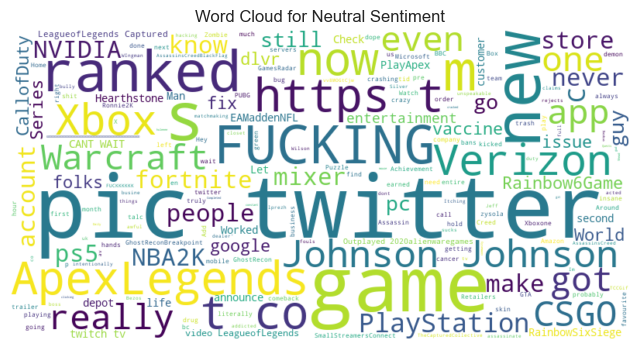

In [22]:
for sentiment in ["Positive", "Negative", "Neutral"]:
    generate_wordcloud(sentiment)